In [1]:
import cv2
import matplotlib.pyplot as plt
import scipy.spatial.distance as ssd
import numpy as np
import os
from os import listdir

### Test HOG

In [25]:
#reading image
img1 = cv2.imread('airplane_query.jpg')  
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)


Gx_img1 = cv2.Sobel(img1,cv2.CV_64F,1,0,ksize=3)
Gy_img1 = cv2.Sobel(img1,cv2.CV_64F,0,1,ksize=3)

'''
Gx_img1 = np.absolute(Gx_img1) * 255/np.max(Gx_img1)
plt.imshow(Gx_img1,cmap = plt.get_cmap('binary'))
plt.show()

Gy_img1 = np.absolute(Gy_img1) * 255/np.max(Gy_img1)
plt.imshow(Gy_img1,cmap = plt.get_cmap('binary'))
plt.show()
'''

"\nGx_img1 = np.absolute(Gx_img1) * 255/np.max(Gx_img1)\nplt.imshow(Gx_img1,cmap = plt.get_cmap('binary'))\nplt.show()\n\nGy_img1 = np.absolute(Gy_img1) * 255/np.max(Gy_img1)\nplt.imshow(Gy_img1,cmap = plt.get_cmap('binary'))\nplt.show()\n"

In [26]:
ForceGradient_img1 = np.sqrt(np.power(Gx_img1,2)+np.power(Gy_img1,2))

In [37]:
ForceGradient_img1.shape

(178, 393, 3)

In [36]:
aretes.shape

(178, 393, 3)

In [40]:
aretes = ForceGradient_img1>80
plt.imshow(aretes, plt.get_cmap('binary'))
plt.show()

ValueError: Unsupported dtype

<Figure size 432x288 with 1 Axes>

In [41]:
FG_img1, AG_img1 = cv2.cartToPolar(Gx_img1, Gy_img1, angleInDegrees=True)

In [51]:
np.max(FG_img1)

930.6266705827853

### Test SIFT

23
352.1418748938519
51
77


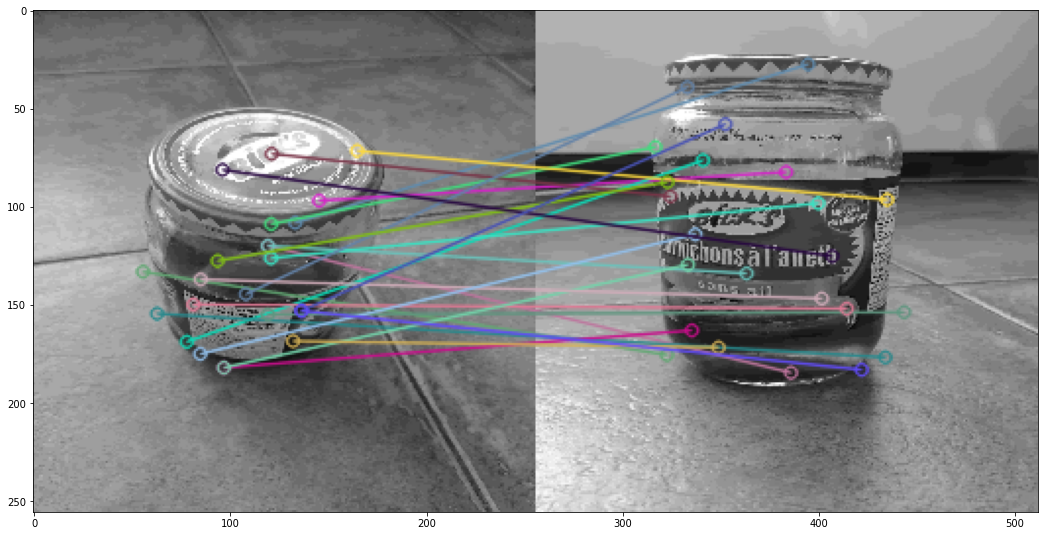

In [341]:
# voir: https://github.com/gabilodeau/INF6804/blob/master/SIFTDescriptor.ipynb
# voir: https://docs.opencv.org/4.x/dc/dc3/tutorial_py_matcher.html

#reading image
img1 = cv2.imread('pickles_querry.jpg',cv2.IMREAD_GRAYSCALE)  
img2 = cv2.imread('database/pickles_4.jpg',cv2.IMREAD_GRAYSCALE)
img1 =cv2.resize(img1,(256,256))
img2 =cv2.resize(img2,(256,256))

#keypoints
sift = cv2.SIFT_create(nOctaveLayers = 3, contrastThreshold=0.05,edgeThreshold =15,sigma=4)
keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)
keypoints_2, descriptors_2 = sift.detectAndCompute(img2,None)


#find matches with brute force matching:
bf = cv2.BFMatcher_create(cv2.NORM_L2,crossCheck=True) #NORM_L2 prend la distance euclidienne
matches = bf.match(descriptors_1,descriptors_2)
matches = sorted(matches, key = lambda x:x.distance)
print(len(matches))
dist=0
for match in matches:
    dist += match.distance
print(dist/len(matches))
print(len(keypoints_1))
print(len(keypoints_2))

plt.figure(figsize = (18,10))
imageout3 = cv2.drawMatches(img1,keypoints_1,img2,keypoints_2,matches[0:30], None, flags = 2)
plt.imshow(imageout3)
plt.show()


## SIFT search in database

In [368]:
def correspond_SIFT1(descriptors_1,descriptors_2,keypoints_1,keypoints_2):
    bf = cv2.BFMatcher(cv2.NORM_L2) #NORM_L2 prend la distance euclidienne de donnée descripteurs
    matches = bf.knnMatch(descriptors_1,descriptors_2,k=2)
    bonMatch = []
    # méthode du ratio: 
    for m,n in matches:
        if m.distance < 0.5*n.distance:
            bonMatch.append([m])
            break
    number_keypoints = 0
    if len(keypoints_1) <= len(keypoints_2):
        number_keypoints = len(keypoints_1)
    else:
        number_keypoints = len(keypoints_2)
    indice = len(bonMatch)/number_keypoints * 100
    return indice

def correspond_SIFT2(descriptors_1,descriptors_2,keypoints_1,keypoints_2):
    bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True) #NORM_L2 prend la distance euclidienne de donnée descripteurs
    matches = bf.match(descriptors_1,descriptors_2)
    dist=0
    for match in matches:
        dist += match.distance
    return dist/len(matches)

def search_database(query):
    im_query = cv2.imread(query,cv2.IMREAD_GRAYSCALE)
    im_query =cv2.resize(im_query,(256,256))

    sift = cv2.SIFT_create(nOctaveLayers = 3, contrastThreshold=0.03,edgeThreshold =15,sigma=4)
    keypoints_1, descriptors_1 = sift.detectAndCompute(im_query,None)
    result = {}
    for images in os.listdir("./database/"):
        database = cv2.imread("./database/"+images,cv2.IMREAD_GRAYSCALE)
        database = cv2.resize(database,(256,256))

        keypoints_2, descriptors_2 = sift.detectAndCompute(database,None)
        #find matches with brute force matching:
        score = correspond_SIFT2(descriptors_1,descriptors_2,keypoints_1,keypoints_2)
        result[score] = images
    myKeys = list(result.keys())
    myKeys.sort()
    sorted_dict = {i: result[i] for i in myKeys}
    print(sorted_dict)


In [377]:
search_database("airplane_query.jpg")

{293.44782165527346: 'dolphin_2.jpg', 297.0149090415553: 'dolphin_4.jpg', 303.94752135100185: 'airplane_1.jpg', 304.2713020726254: 'ball_2.jpg', 306.728680840854: 'airplane_4.jpg', 307.9615430831909: 'ball_3.jpg', 313.4828002566383: 'airplane_2.jpg', 320.9977996826172: 'ball_5.jpg', 324.49426523844403: 'face_3.jpg', 327.69822216033936: 'dolphin_3.jpg', 330.0409469604492: 'airplane_3.jpg', 331.3031212059227: 'face_1.jpg', 332.98542868124474: 'dolphin_5.jpg', 333.0467185974121: 'pickles_4.jpg', 333.17358350753784: 'face_5.jpg', 333.3083862304687: 'lotus_3.jpg', 335.1225959514749: 'face_4.jpg', 336.3787967847741: 'lotus_5.jpg', 336.8059659211532: 'pickles_1.jpg', 337.02598928897936: 'cat_1.jpg', 338.37826650282915: 'airplane_5.jpg', 338.86004873422473: 'ball_1.jpg', 341.5098313122261: 'lotus_1.jpg', 342.05736146149815: 'pickles_5.jpg', 342.1678779602051: 'cat_5.jpg', 342.55570242745534: 'car_1.jpg', 342.9296864827474: 'car_2.jpg', 343.6169981345152: 'car_5.jpg', 346.6373772872122: 'ball_4

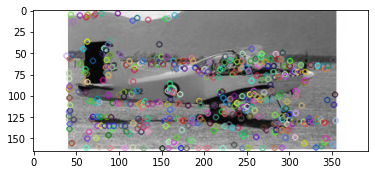

In [351]:
#reading image
img2 = cv2.imread('./database/airplane_1.jpg')  
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

#keypoints
sift = cv2.xfeatures2d.SIFT_create(	nOctaveLayers = 3, contrastThreshold=0.04,edgeThreshold = 10,sigma=1.6)
keypoints_2, descriptors_2 = sift.detectAndCompute(img2,None)

img_2 = cv2.drawKeypoints(gray2,keypoints_2,img2)
plt.imshow(img_2)
plt.show()


In [21]:
descriptors_1.shape

(295, 128)

In [20]:
descriptors_2.shape

(447, 128)